In [1]:
library(Cardinal)
library(yaml)

Loading required package: ProtGenerics




Attaching package: ‘ProtGenerics’


The following object is masked from ‘package:stats’:

    smooth


Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: BiocParallel

Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand

# Hyperparameters

In [2]:
# Read the hyperparameters from the config file
config <- read_yaml("workspace/config.yml")

# Hyperparameters
lames <- list.files(config$path_to_data)
lame <- lames[1]

# Path to the data and results
path <- sprintf("%s/%s", config$path_to_data, lame)

Warning message in readLines(file, warn = readLines.warn):
“incomplete final line found on 'workspace/config.yml'”


# Concatenate the peaks from all the lames

In [3]:
# Initialize the peaks
peaks <- c()
for (lame in lames) {
  # Load the detected peaks imzml file
  mse_peaks <- readMSIData(sprintf("%s/%s/results/mse_densities.imzML",
                                   config$path_to_data, lame))

  # Change the data centroided attribute to TRUE
  centroided(mse_peaks) <- TRUE

  # Filter the peaks with low frequency
  mse_peaks <- subsetFeatures(mse_peaks, freq > 0.01)

  # Concatenate the peaks
  peaks <- c(peaks, mz(mse_peaks))
}

# Plot the histogram of distances

Warning message in hist.default(distances, xlim = c(0, 1), ylim = c(0, 2000), breaks = 1e+07, :
“'breaks = 1e+07' is too large and set to 1e6”


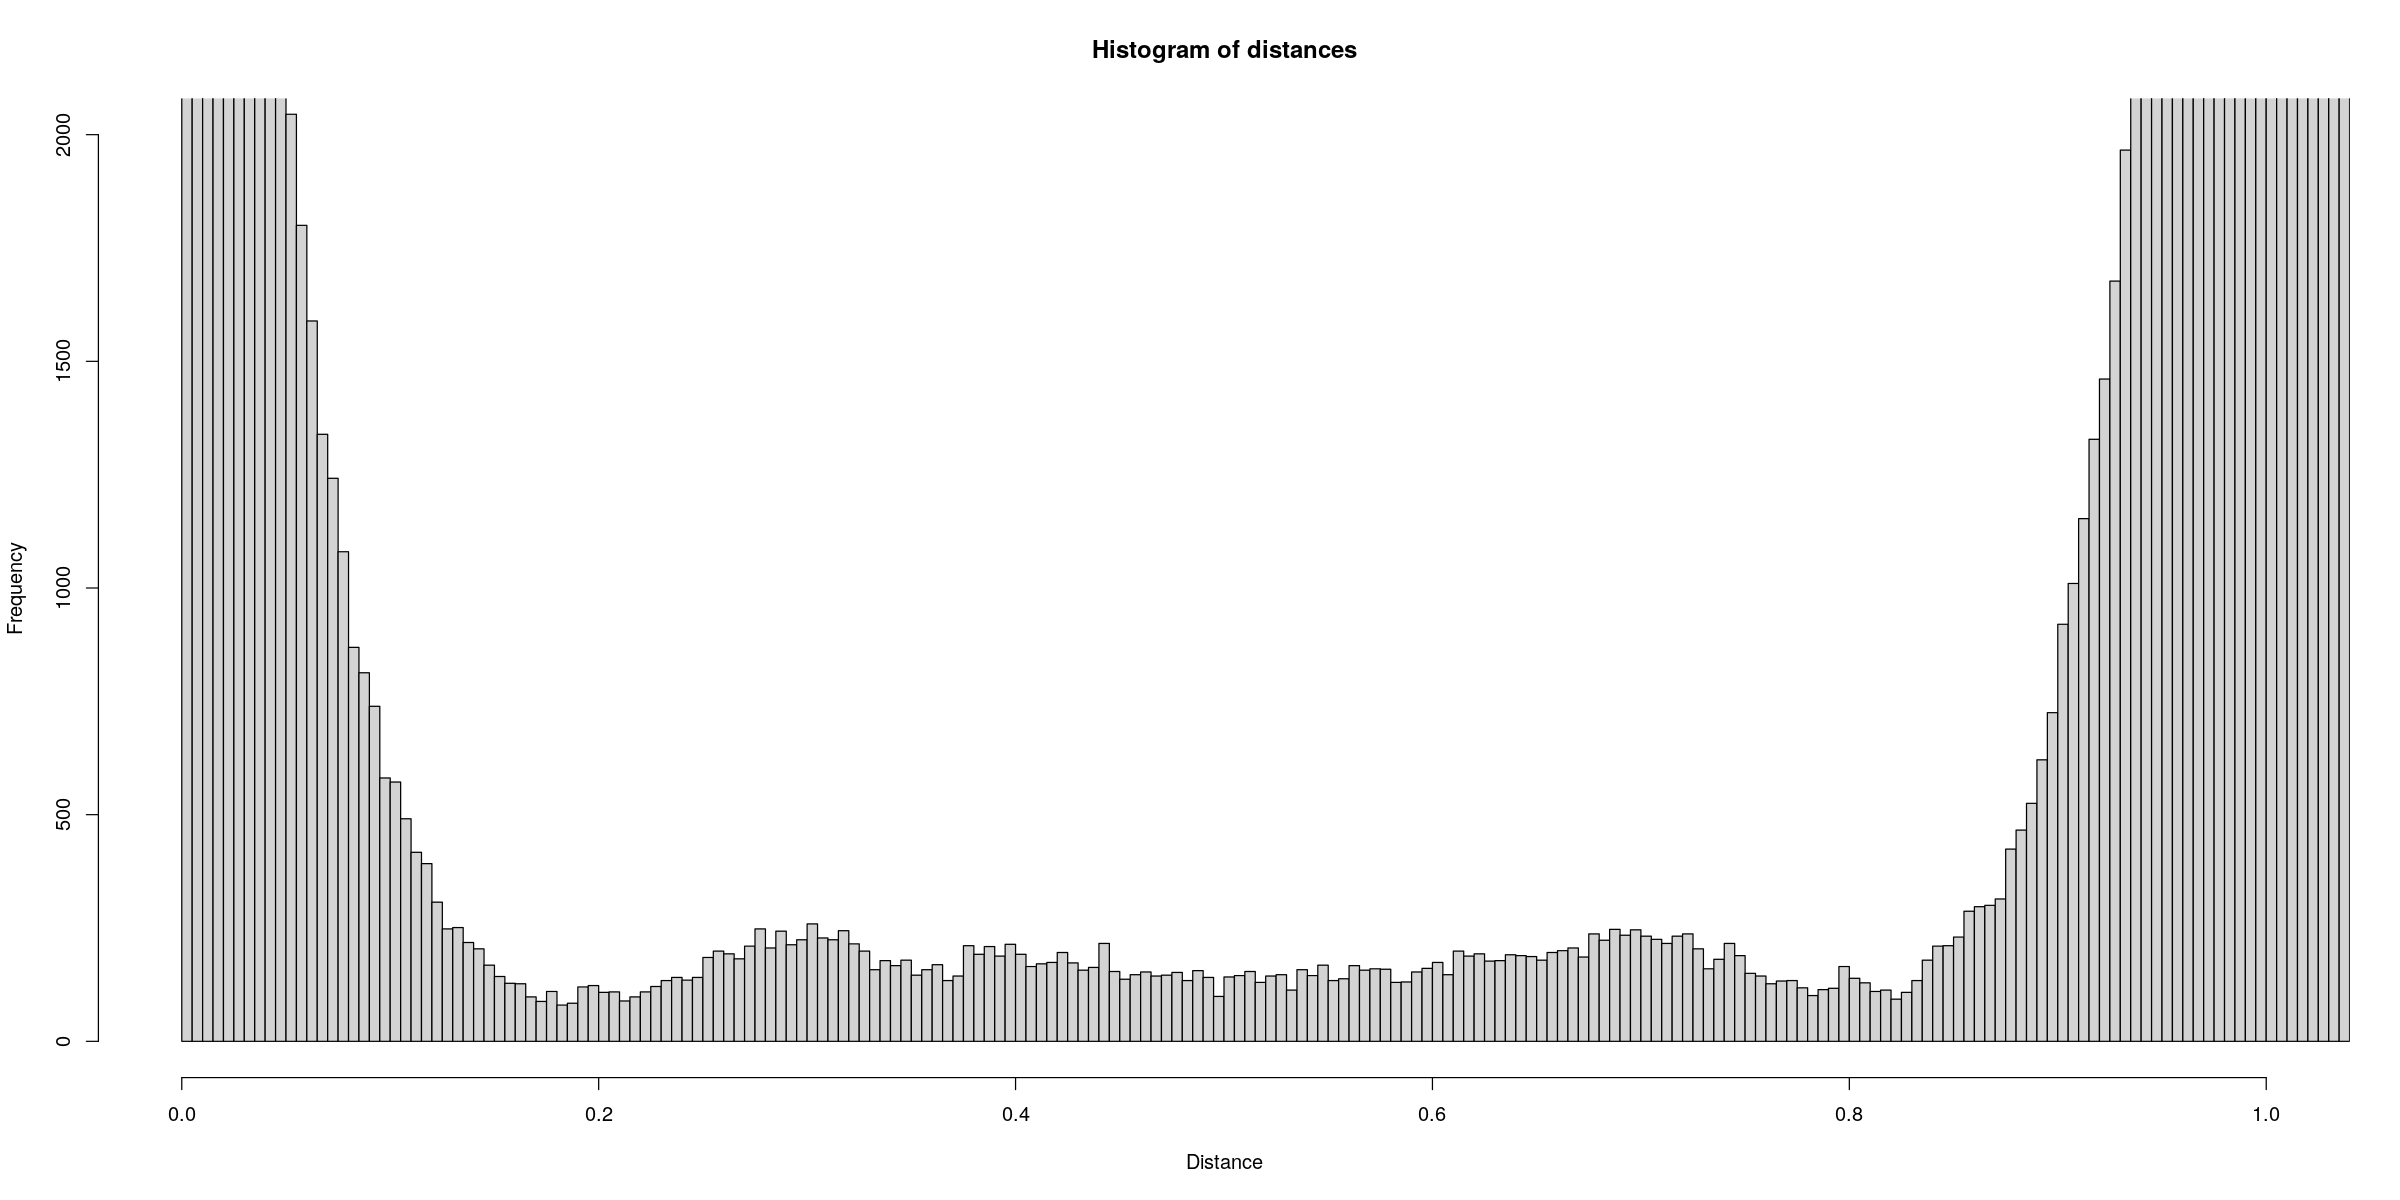

In [4]:
# Compute the distance matrix
distances <- dist(peaks)

# Plot a histogram of the distances
options(repr.plot.width = 20, repr.plot.height = 10)
hist(distances, xlim = c(0, 1), ylim = c(0, 2000), breaks = 1e+07,
     main = "Histogram of distances for all the peaks",
     xlab = "Distance",
     ylab = "Frequency")

# Perform a hierarchical clustering to obtain a reference for the peaks

In [5]:
# Determine the tolerance value
tolerance <- 0.25

# Perform the hierarchical clustering
hierarchical_clustering <- hclust(d = distances, method = "complete")

# Cut the tree with the height of the tolerance value to get the clusters
clusters <- cutree(tree = hierarchical_clustering, h = tolerance)

# Get the mean of the clusters
reference <- tapply(X = peaks, INDEX = clusters, FUN = mean)

Warning message in hist.default(distances, xlim = c(0, 1), ylim = c(0, 2000), breaks = 1e+07, :
“'breaks = 1e+07' is too large and set to 1e6”


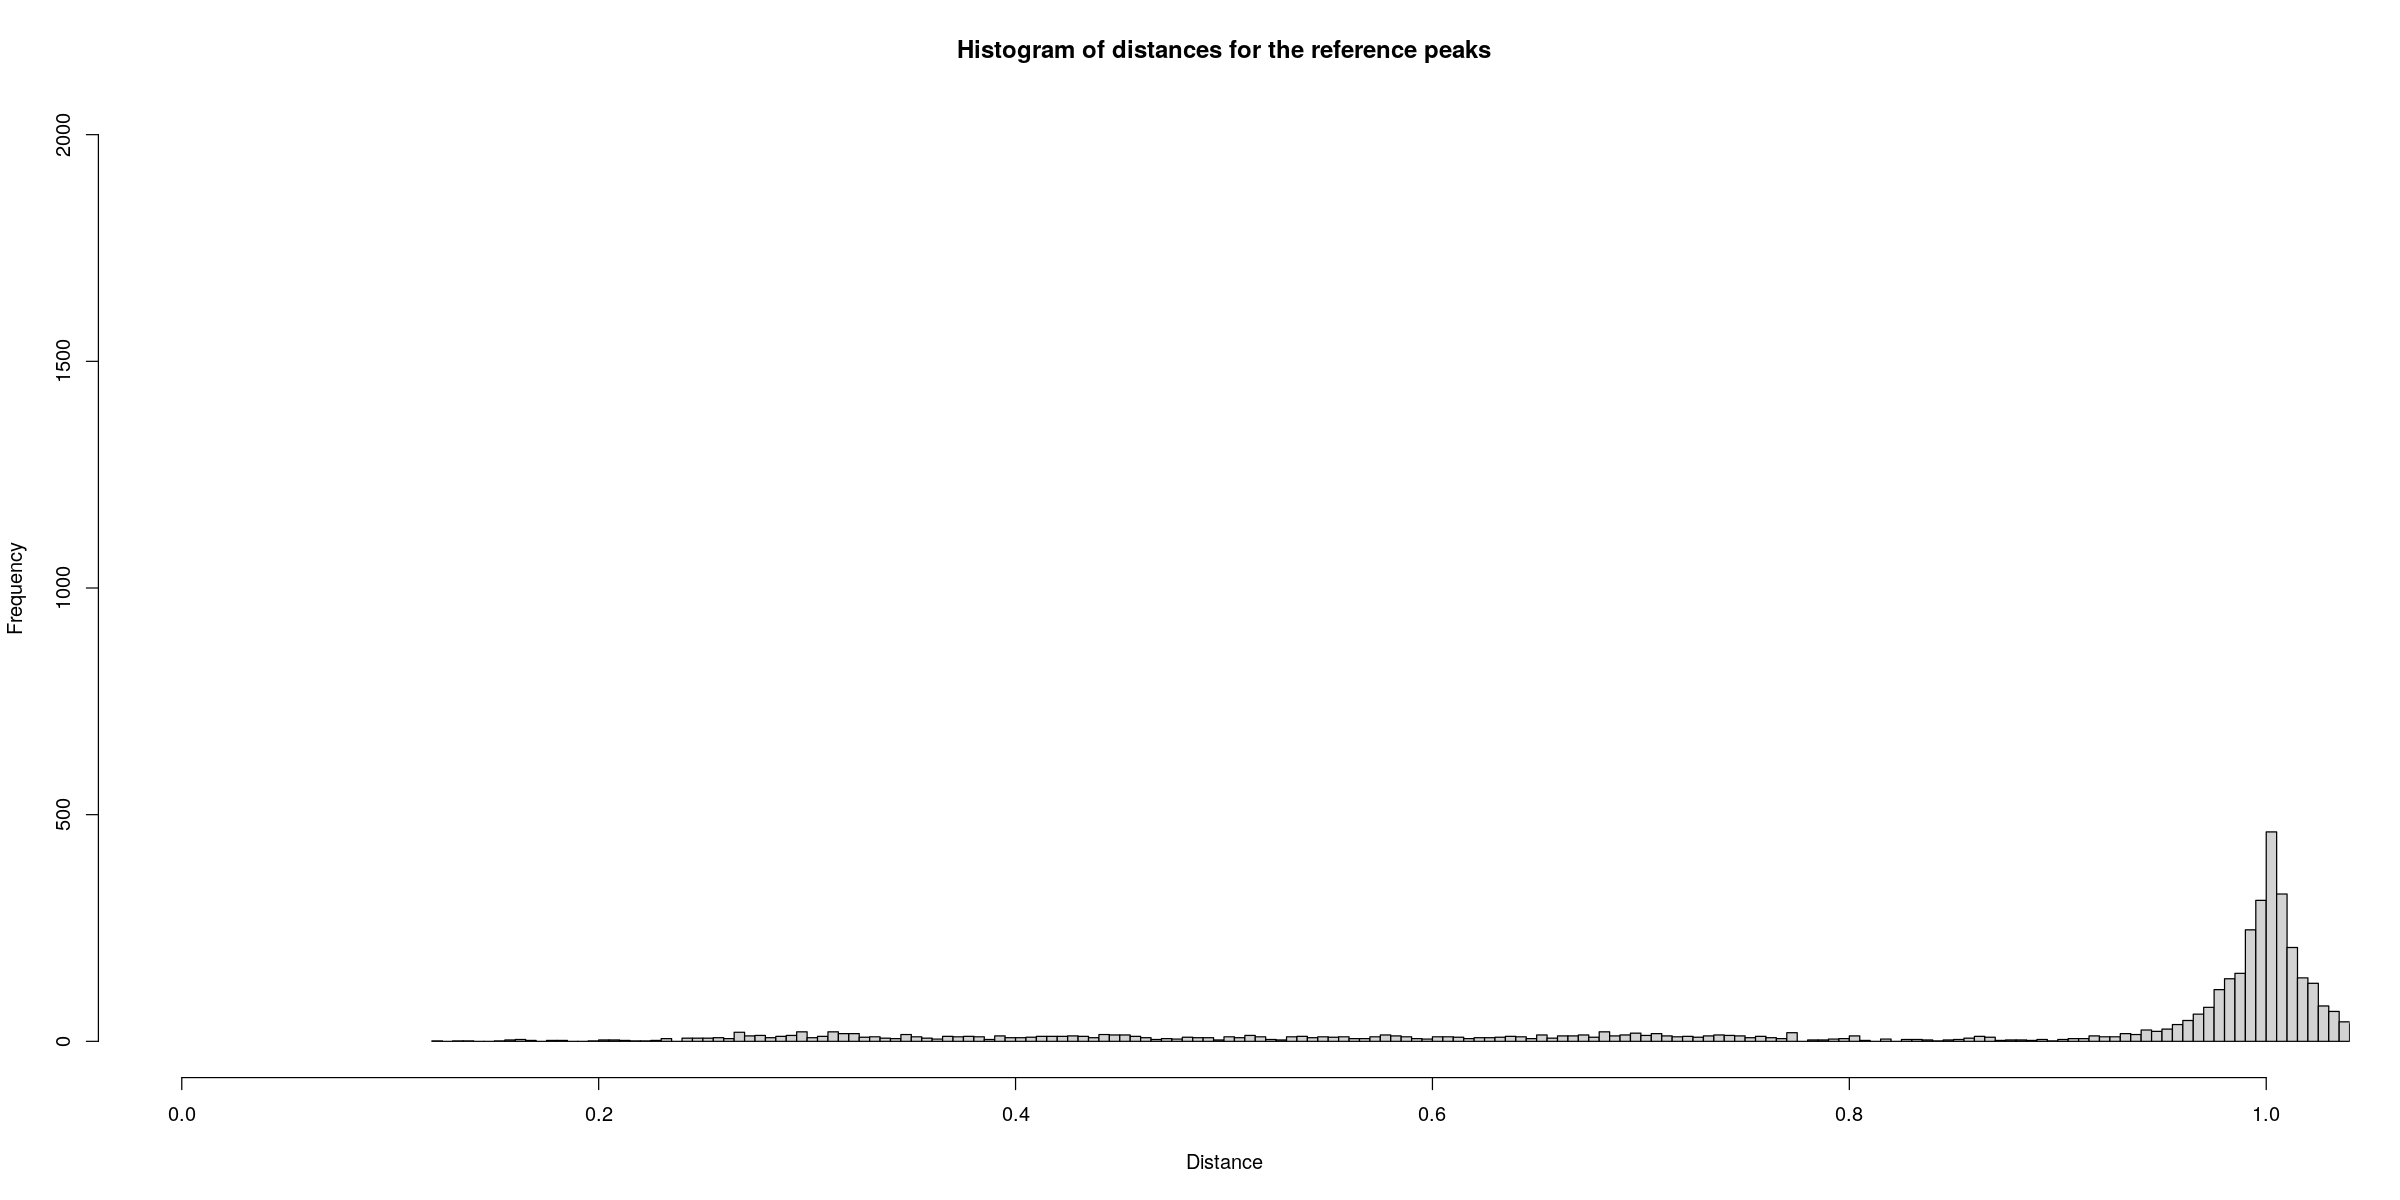

In [7]:
# Compute the distance matrix
distances <- dist(reference)

# Plot a histogram of the distances
options(repr.plot.width = 20, repr.plot.height = 10)
hist(distances, xlim = c(0, 1), ylim = c(0, 2000), breaks = 1e+07,
     main = "Histogram of distances for the reference peaks",
     xlab = "Distance",
     ylab = "Frequency")

In [6]:
# Print the length of the peaks and the reference
print(sprintf("Length of all the peaks: %d", length(peaks)))
print(sprintf("Length of the reference: %d", length(reference)))

[1] "Length of all the peaks: 29158"
[1] "Length of the reference: 3482"
